In [26]:
import pandas as pd
import random
import numpy as np

In [27]:

# Definiamo le condizioni mediche possibili
conditions = ["disabilità cognitiva A", "disabilità cognitiva B", "disabilità cognitiva C", "disabilità motoria"]

# Creiamo il DataFrame
df = pd.DataFrame(conditions, columns=["condition"])

# Salviamo il DataFrame in un file CSV
df.to_csv("condition.csv", index_label="index")


In [28]:
# Carichiamo il file delle condizioni mediche
conditions_df = pd.read_csv("condition.csv")

# Definiamo il numero di utenti (bambini)
num_users = 50

# Generiamo i dati casuali per il file user.csv
users_data = {
    "user_id": [i for i in range(num_users)],
    "condition_id": [random.choice(conditions_df["index"]) for _ in range(num_users)]
}

# Creiamo il DataFrame per gli utenti
users_df = pd.DataFrame(users_data)

# Salviamo il DataFrame in un file CSV
users_df.to_csv("user.csv", index=False)

In [29]:

# Lista delle attività e dei relativi livelli di difficoltà
activities = [
    {"activity": "Disegno con matite colorate o pastelli", "difficulty": 0.3},
    {"activity": "Colorare immagini stampate con varie sfumature di colori", "difficulty": 0.3},
    {"activity": "Usare timbri per creare pattern e disegni", "difficulty": 0.3},
    {"activity": "Completare puzzle con pezzi di dimensioni adatte", "difficulty": 0.4},
    {"activity": "Classificare e ordinare forme geometriche e colori", "difficulty": 0.4},
    {"activity": "Costruire strutture con blocchi di legno o plastica", "difficulty": 0.4},
    {"activity": "Giocare con bambole o pupazzi, creando scenari e dialoghi", "difficulty": 0.5},
    {"activity": "Fare finta di cucinare con giocattoli da cucina e cibo finto", "difficulty": 0.5},
    {"activity": "Simulare situazioni quotidiane come fare la spesa o andare al dottore", "difficulty": 0.5},
    {"activity": "Giocare con palloni da calcio o da basket", "difficulty": 0.6},
    {"activity": "Guidare macchinine su piste o creare percorsi con ostacoli", "difficulty": 0.6},
    {"activity": "Saltare su trampolini o fare giri in bicicletta", "difficulty": 0.6},
    {"activity": "Creare opere d'arte con carta, colla e materiali riciclati", "difficulty": 0.7},
    {"activity": "Realizzare sculture con pasta modellabile o plastilina", "difficulty": 0.7},
    {"activity": "Dipingere con le dita o con spugne per esplorare diverse texture e tecniche", "difficulty": 0.7},
    {"activity": "Associare immagini con parole corrispondenti", "difficulty": 0.8},
    {"activity": "Ordinare oggetti in base a dimensione, colore o forma", "difficulty": 0.8},
    {"activity": "Risolvere semplici problemi matematici utilizzando manipolativi", "difficulty": 0.8},
    {"activity": "Esplorare diverse consistenze con giochi di sabbia, farina o gelatina", "difficulty": 0.9},
    {"activity": "Scoprire nuovi odori e sapori attraverso attività di cucina o esperimenti sensoriali", "difficulty": 0.9},
    {"activity": "Ascoltare e identificare suoni con strumenti musicali o registrazioni", "difficulty": 0.9},
    {"activity": "Esplorare la natura e raccogliere oggetti come foglie, sassi o fiori", "difficulty": 1.0},
    {"activity": "Giocare con acqua e sabbia in un tavolo sensoriale", "difficulty": 1.0},
    {"activity": "Svolgere attività di coordinazione e equilibrio su scivoli o altalene", "difficulty": 1.0}
]

# Generiamo i dati per il file activity.csv
activity_data = {
    "id": [i for i in range(len(activities))],
    "activity": [activity["activity"] for activity in activities],
    # la condizione target dipende dalla difficoltà dell'attività
    "target_condition": [int(np.floor(activity["difficulty"] * len(conditions_df)) - 1) for activity in activities]
}

# Creiamo il DataFrame per le attività
activity_df = pd.DataFrame(activity_data)

# Salviamo il DataFrame in un file CSV
activity_df.to_csv("activity.csv", index=False, sep="|")


In [30]:
# Carichiamo i file condition.csv e activity.csv
user_df = pd.read_csv("user.csv")
activity_df = pd.read_csv("activity.csv", sep="|")

# Definiamo la funzione per generare le preferenze realistiche
def generate_preferences(user_condition, activity_target_condition):
    # generiamo sparsità nei dati
    if np.random.uniform(0, 1) < 0.1:
        if user_condition == activity_target_condition:
            # Se la condizione del bambino è uguale al target dell'attività, 
            # generiamo una valutazione alta con probabilità maggiore
            return np.random.uniform(0.7, 1)
        else:
            # Altrimenti, generiamo una valutazione casuale con probabilità inferiore
            return np.random.uniform(0, 0.5)
    else:
        return -1

# Generiamo i dati per il file preference.csv
preference_data = []
for user_index, user_row in users_df.iterrows():
    user_condition = user_row['condition_id']
    for activity_index, activity_row in activity_df.iterrows():
        activity_target_condition = activity_row['target_condition']
        preference = generate_preferences(user_condition, activity_target_condition)
        preference_data.append([user_index, activity_index, preference])

# Creiamo il DataFrame per le preferenze
preference_df = pd.DataFrame(preference_data, columns=["user_id", "activity_id", "preference"])

# Salviamo il DataFrame in un file CSV
preference_df.to_csv("preference.csv", index=False)


In [32]:
# Visualizziamo la matrice delle preferenze e vediamo quante valutazioni sono state generate
print(preference_df)
print("Numero di valutazioni generate:", len(preference_df[preference_df["preference"] != -1]))
print("Numero di valutazioni mancanti:", len(preference_df[preference_df["preference"] == -1]))

      user_id  activity_id  preference
0           0            0   -1.000000
1           0            1   -1.000000
2           0            2    0.481939
3           0            3   -1.000000
4           0            4   -1.000000
...       ...          ...         ...
1195       49           19   -1.000000
1196       49           20   -1.000000
1197       49           21   -1.000000
1198       49           22   -1.000000
1199       49           23   -1.000000

[1200 rows x 3 columns]
Numero di valutazioni generate: 112
Numero di valutazioni mancanti: 1088


array([[<Axes: title={'center': 'preference'}>]], dtype=object)

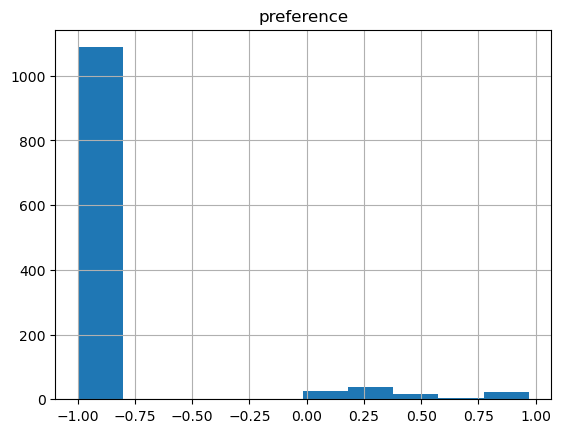

In [33]:
preference_df.hist(column="preference", bins=10)